Vụ đắm tàu ​​Titanic là một trong những vụ đắm tàu ​​khét tiếng nhất trong lịch sử.

Vào ngày 15 tháng 4 năm 1912, trong chuyến đi đầu tiên của mình, con tàu RMS Titanic được nhiều người coi là “không thể chìm” đã chìm sau khi va chạm với một tảng băng trôi. Thật không may, không có đủ thuyền cứu sinh cho tất cả mọi người trên tàu, dẫn đến cái chết của 1502 trong số 2224 hành khách và phi hành đoàn.

Mặc dù có một số yếu tố may mắn liên quan đến việc sống sót, nhưng có vẻ như một số nhóm người có khả năng sống sót cao hơn những nhóm khác.

Trong thử thách này, mục tiêu  là thực hiện Data Analyst để trả lời câu hỏi: “những loại người nào có nhiều khả năng sống sót hơn?” sử dụng dữ liệu hành khách (như tên, tuổi, giới tính, tầng lớp kinh tế xã hội, v.v.).

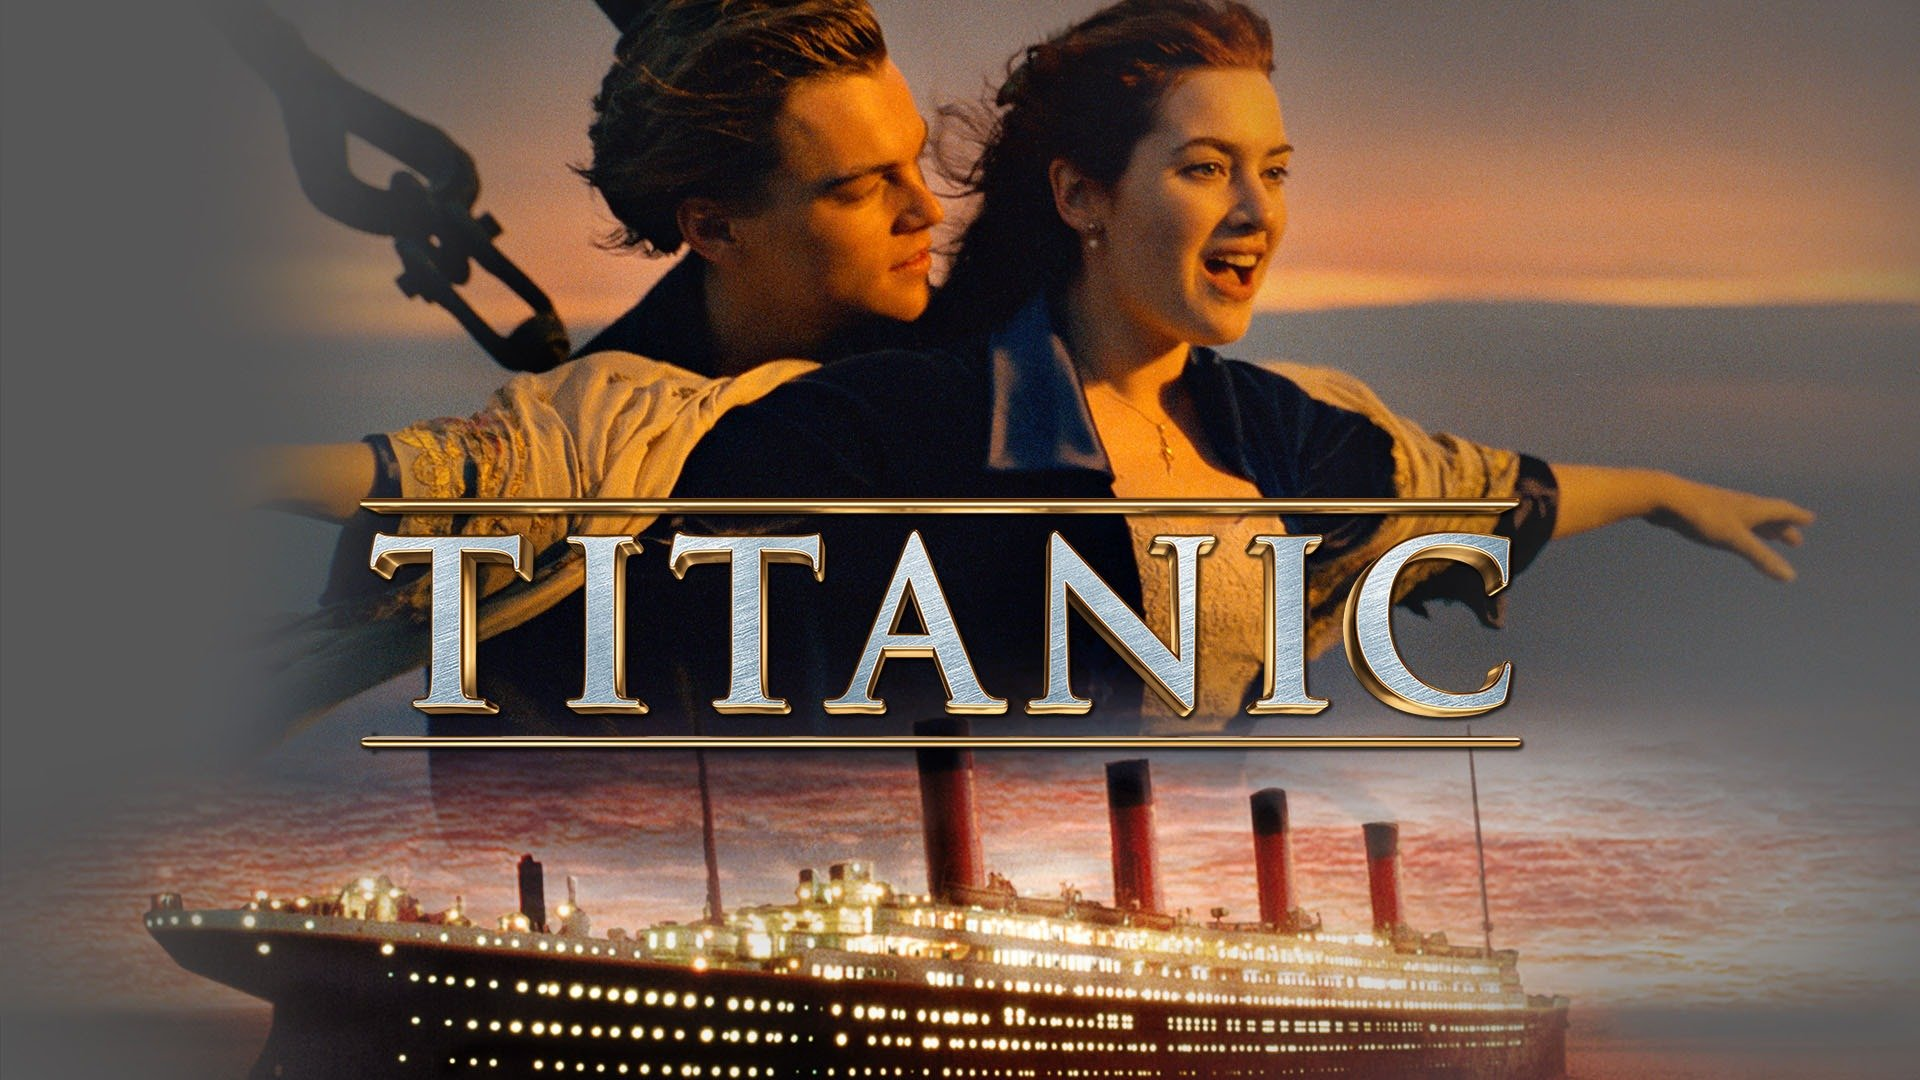

In [19]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#set column 'PassengerId' làm index
train_df.set_index('PassengerId',inplace = True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# load file test
test_df = pd.read_csv('train.csv', index_col = 'PassengerId' )

In [22]:
#explore data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


-  Phân loại các columns như sau:

- Categorical (biến phân loại): Survived, Sex, Parch, Embarked, SibSp, Pclass(là category, loại số theo thứ tự).
- Numerical: (biến liên tục)- Age,  (biến rời rạc) - Fare
- Mix type of data: ticket, cabin
- Contain error/typo: Name
- blank or null: cabin, age, Embarked  
- various data type: string, int, float

Chuyển 6 columns categorical về đúng kiểu category

In [25]:
train_df.loc[:,['Survived','Sex','Parch','Embarked','SibSp','Pclass']] = \
train_df.loc[:,['Survived','Sex','Parch','Embarked','SibSp','Pclass']].astype('category')

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


Tìm hiểu phân bổ các giá trị của các column numerical:

In [29]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Tìm hiểu phân bổ các giá trị của các column category:

In [28]:
train_df.describe(include = 'category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Khám phá dữ liệu

1. khám phá column target : Survived
- Câu hỏi: bao nhiêu % những người trên chuyến tàu titanic còn sống, mất mạng

In [32]:
train_df['Survived'].value_counts()

,Survived
0,549
1,342


In [33]:
train_df['Survived'].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


- Kết luận : 38% số người sống sót, 62% người thiệt mạng

2. khám phá column sex 

In [34]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


- Kết luận : 64% số người là nam, 36% người là nữ

Câu hỏi: Hãy liên kết giới tính với số người sống sót để biết tỉ lệ bao nhiêu nam, bao nhiêu nữ sống sót/ thiệt mạng

<AxesSubplot:xlabel='Sex', ylabel='count'>

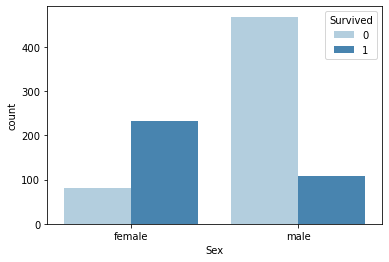

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette = 'Blues')

- Kết luận: Đối với nữ: số người sống sót khá cao so với số người thiệt mạng, ngược lại đối với nam: số người thiệt mạng cao hơn rất nhiều so với sống sót
- Có thể lý giải là do văn hóa lady first những lúc nguy kịch nữ được ưu tiên nhận điều kiện sinh tồn tốt hơn nam giới.

- Remaining categorical features columns:

Câu hỏi: Muốn visualize tương quan giữa tất cả categorical column với column target: Survived

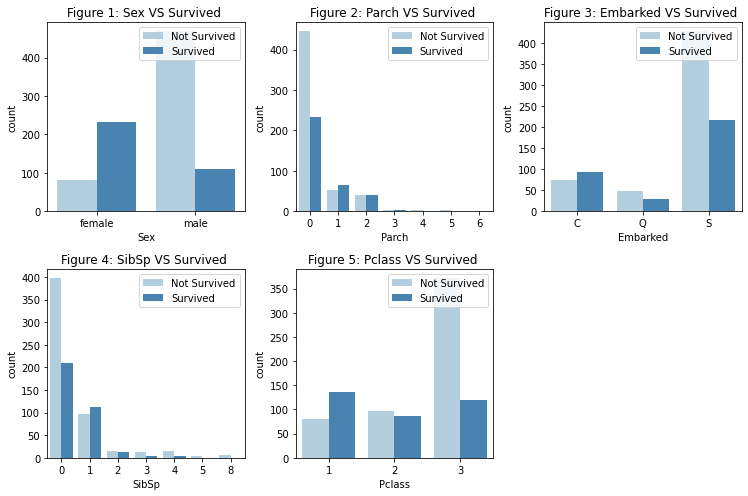

In [53]:
cols = ['Sex','Parch','Embarked','SibSp','Pclass']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r *n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: {cols[i]} VS Survived ")
            ax_i.legend(title = "", loc = "upper right",labels=["Not Survived","Survived"])
ax.flat[-1] .set_visible(False)          
plt.tight_layout()
plt.show()

-Kết luận : 
- Hình 1: Sex: đã kết luận bên trên
- Hình 2: Parch -  feature nói đến việc hành khách có đi cùng ba mẹ hoặc ngược lại ba mẹ có đi cùng con cái:
    - Những hành khách đi du lịch 1 mình (trục x = 0) thì thiệt mạng cao hơn nhiều so với survived
    - Còn hk có đi cùng ba mẹ (trục x= 1 / 2) thì tỉ lệ survived ngang với thiệt mạng
- Hình 3: Embarked nói đến các cảng khởi hành của khách hàng:
    - Số ng đi từ cảng Southampton tử vọng khá cao so với survived, 2 cảng còn lại tỉ lệ survived ngang với thiệt mạng
- Hình 4: SibSp - Nói đến việc khách hàng đi cùng anh/chị em ruột hoặc họ hàng
    - Tương tự với Parch ở hình 2, những ng đi du lịch 1 mình (trục x=0) thì tỉ lệ thiệt mạng rất cao
- Hình 5: Pclass - Nói đến các loại vé của khách hàng: hạng thương gia,.. phổ thông 
    - Class 1 là hạng thương gia dễ thấy ng sống sót cao hơn ng thiệt mạng => khi xảy ra tại nạn được ưu tiên, class 3 là hạng phổ thông thì số ng thiệt mạng rất nhiều

- Khám phá column ở dạng numerical:

1. Visualize phân bổ độ tuổi của các hành khách

<AxesSubplot:xlabel='Age', ylabel='Count'>

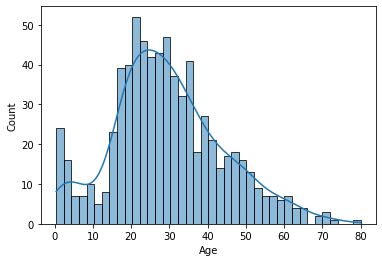

In [54]:
sns.histplot(data= train_df, x = 'Age', bins = 40, kde = True)

- Kết luận : Dễ dàng nhận thấy phân bổ độ tuổi tập trung cao nhất từ khoảng 18 - 35

- Bây giờ mình sẽ visualize độ tuổi cùng với số người survived :

<AxesSubplot:xlabel='Age', ylabel='Count'>

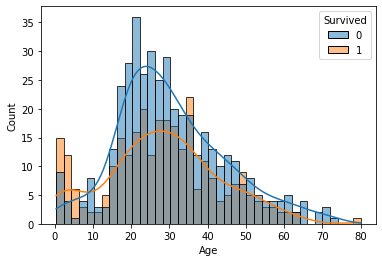

In [59]:
sns.histplot(data= train_df, x = 'Age',hue = 'Survived', bins = 40, kde = True)

- Kết luận : 
    - Biểu đồ trên cột màu xanh : thiệt mạng, màu cam: survived. 
    - Trong độ tuổi 18 - 35 thì số người thiệt mạng cao hơn số ng sống sót
    - Trẻ em độ tuổi < 14 các cột: có màu cam cao hơn màu xanh tương tự với độ tuổi ~80, chứng tỏ trẻ em và người già đã được ưu tiên điều kiện survived, 
    - Chỉ có 2 điểm ngoại lệ sinh tồn cao hơn thiệt mạng lần lượt ở khoảng tuổi ~ 35 và ~ 50 khi 2 độ tuổi này không thuộc trẻ em hay người già


Tiếp tục explore 1 column vẫn thuộc numerical : 'Fare' giá vé

In [61]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- std = 49.693429 => độ lệch chuẩn  = 49.693429 => giá các loại vé chênh nhau là khá lớn
- 25% số lượng vé có giá < 7.9 đô
- 50% số lượng vé có giá < 14.45 đô
- 75% số lượng vé có giá < 31 đô Suy ra cũng có 25% số lượng vé có giá > 31 đô

<AxesSubplot:xlabel='Fare', ylabel='Count'>

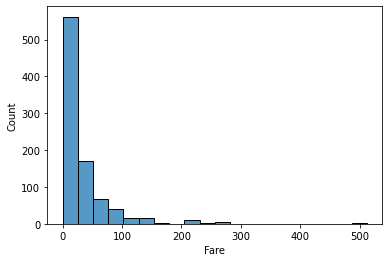

In [65]:
sns.histplot(data= train_df, x= 'Fare', bins = 20)

Tương tự liên kết giá vé với survived

Text(0.5, 1.0, 'Tương quan giữa giá vé Fare với Survived')

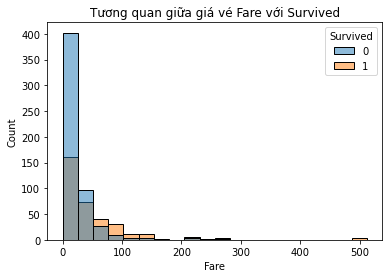

In [75]:
sns.histplot(data= train_df, x= 'Fare', hue = 'Survived', bins = 20).set_title('Tương quan giữa giá vé Fare với Survived')

- Biểu đồ cho ta biết những người có vé giá thấp thì số lượng thiệt mạng rất nhiều, hay nói cách khác là khi xảy ra accident thì ưu tiên điều kiện sinh tồn cho ng vé giá cao 

- Vẫn chưa đủ rõ ràng:
    - Mình muốn cắt  column 'Fare'  ra 4 khoảng giá, mỗi khoảng giá đều ứng với 25% số lượng vé (giống với hàm describe ở trên)
    - và đặt tên cho từng khoảng 0-25%, 25%-50%, 50%-75%, 75%-100%
- Sau đó mình có thể biến đổi sang 1 biểu đồ khác rõ ràng hơn

In [71]:
fare_category = ['Economic', 'Standard', 'Expensive', 'Luxury']
df_cat_fare = pd.qcut(train_df['Fare'],4, labels = fare_category).to_frame()
df_cat_fare

,Fare
PassengerId,
1,Economic
2,Luxury
3,Standard
4,Luxury
5,Standard
...,...
887,Standard
888,Expensive
889,Expensive


Text(0.5, 1.0, 'fare classification and plot with Survived')

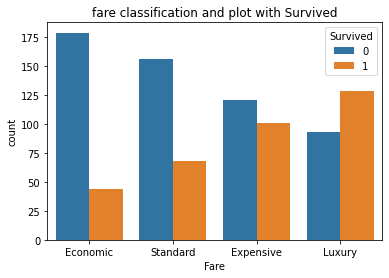

In [76]:
sns.countplot(data = df_cat_fare, x= 'Fare', hue = train_df['Survived']).set_title('fare classification and plot with Survived')

- Từ biểu đồ này đã thấy rất rõ với những ng có vé Luxury thì số lượng sống sót cao hơn thiêt mạng, expensive là ngang nhau, còn đối với economic và standard thì số lượng thiệt mạng cao hơn